In [1]:
%matplotlib widget
%load_ext line_profiler
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from suite2p.blat import blatify

ops = {
    'imaging': {
        'flybacks': [True, False] * 2,
    },
}
# root = '/home/loulou/Documents/Data/Test/place_cells2'
root = '/mnt/DATA/CA3/Bernard/2024_06_27'

analysis = blatify(root, ops=ops)


found 1 behaviour files: ['behaviour_00022.h5']
found 4 planes: ['plane0', 'plane1', 'plane2', 'plane3']
extracting behaviour behaviour_00022.h5
loading plane1
loading plane3
running place cells analysis for plane 1


Output()

/home/loulou/Documents/GitHub/suite2p/suite2p/blat/space.py:96: RuntimeWarning: invalid value encountered in divide
  rasters = rasters / occ
/home/loulou/Documents/GitHub/suite2p/suite2p/blat/space.py:105: RuntimeWarning: invalid value encountered in divide
  r = np.sum( (x - np.mean(x, axis=0)) * (y - np.mean(y, axis=0)), axis=0 ) /\


running maximum a posteriori estimation


/home/loulou/Documents/GitHub/suite2p/suite2p/blat/bayes.py:47: RuntimeWarning: divide by zero encountered in log
  log_fx = np.log(fx)


running place cells analysis for plane 3


/home/loulou/Documents/GitHub/suite2p/suite2p/blat/KSG.py:72: RuntimeWarning: Estimated mutual information contains negatives.
  warnings.warn('Estimated mutual information contains negatives.', RuntimeWarning)


Output()

/home/loulou/Documents/GitHub/suite2p/suite2p/blat/space.py:96: RuntimeWarning: invalid value encountered in divide
  rasters = rasters / occ
/home/loulou/Documents/GitHub/suite2p/suite2p/blat/space.py:105: RuntimeWarning: invalid value encountered in divide
  r = np.sum( (x - np.mean(x, axis=0)) * (y - np.mean(y, axis=0)), axis=0 ) /\


running maximum a posteriori estimation


/home/loulou/Documents/GitHub/suite2p/suite2p/blat/bayes.py:47: RuntimeWarning: divide by zero encountered in log
  log_fx = np.log(fx)


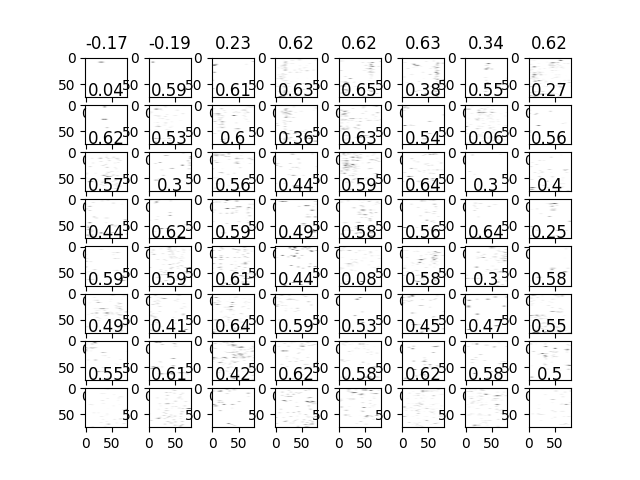

In [20]:
plane = analysis.plane[1]['analysis']
ispc = np.flatnonzero(plane['tests']['split'] < .05)
idx = np.argsort(plane['stability'][ispc])[::-1]
idx = ispc[idx]

fig, axes = plt.subplots(8, 8)
for i, ax in enumerate(axes.flat):
    ax.imshow(-plane['smooth']['rasters'][idx[i], :, :].T, cmap='gray')
    ax.set_title(np.round(plane['SI'][idx[i]], 2))
# fig = plt.figure()

/home/loulou/Documents/GitHub/suite2p/suite2p/blat/bayes.py:47: RuntimeWarning: divide by zero encountered in log
  log_fx = np.log(fx)


Text(0.5, 1.0, '62.72451159450936')

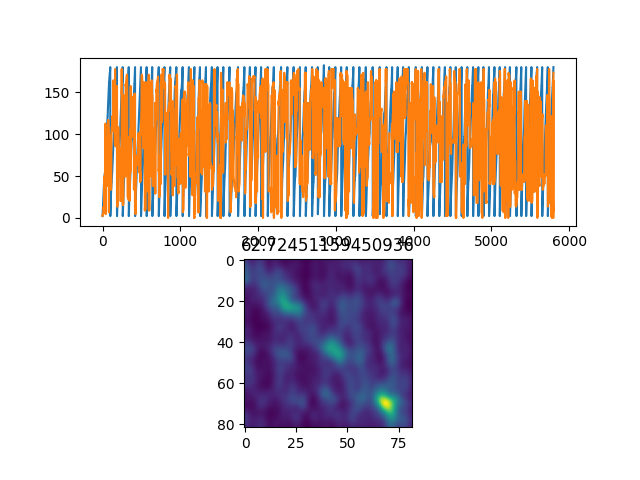

In [88]:
from suite2p.blat import crossvalidate

plane = analysis.plane[1]
mvt = plane['behaviour']['movement']
x = plane['behaviour']['position'][mvt]
n = plane['spks'][:, mvt]
n = n[~np.all(n == 0, axis=1), :]
ret = crossvalidate(x, n, dt=15, sigma=2)

fig, axs = plt.subplots(2)
axs[0].plot(ret['real'])
axs[0].plot(ret['decoded'])
axs[1].imshow(ret['cm'])
axs[1].set_title(ret['error'])

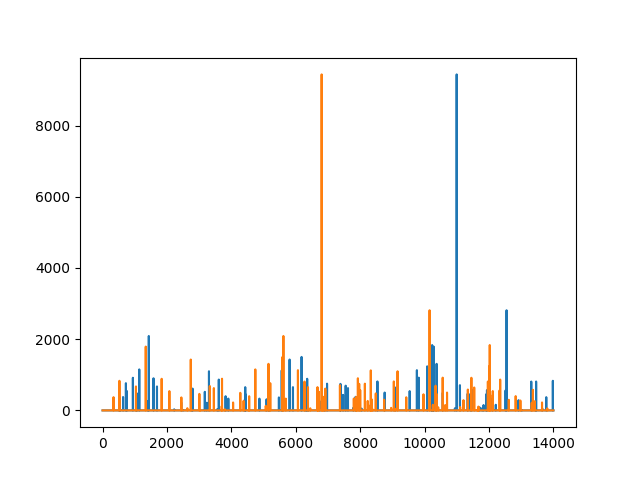

In [94]:
def burst_shuffler(spks: np.ndarray):
    spks = spks.copy()
    for i, train in enumerate(spks):
        isi = np.diff(np.flatnonzero(train))
        np.random.shuffle(isi)
        np.random.shuffle(train)
        isi = np.cumsum(np.concatenate(([0], isi)))
        shuffled = np.zeros_like(train)
        shuffled[isi] = train[train != 0]
        shuffled = np.roll(shuffled, np.random.randint(train.shape[0]))
        spks[i, :] = shuffled

    return spks

spks = analysis.plane[1]['spks']
shuffled = burst_shuffler(spks)

fig = plt.figure()
plt.plot(spks[0, :])
plt.plot(shuffled[0, :])

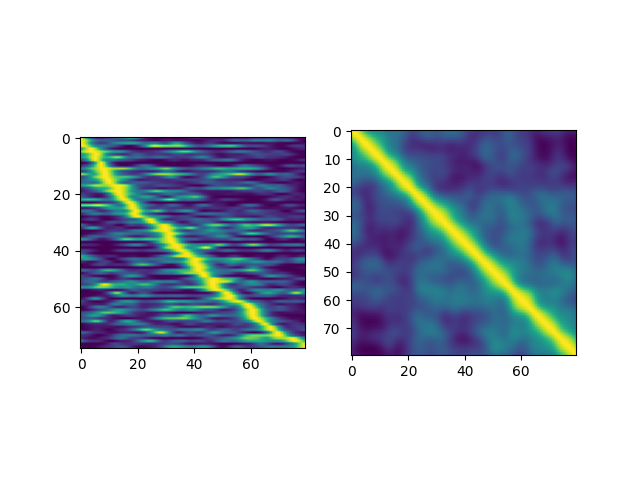

In [22]:
ispc = np.flatnonzero(plane['tests']['split'] < .05)
stack = plane['smooth']['stack'][ispc, :].T
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
idx = np.argmax(stack, axis=0)
idx = np.argsort(idx)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(stack[:, idx].T)
axs[1].imshow(np.corrcoef(stack))


(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
         0.,  0.,  7.,  6.,  2.,  8., 12., 11., 13., 17.,  8.,  9.,  7.,
         3.,  2.,  2.,  4.,  2.,  2.,  1.,  0.,  0.,  1.,  2.]),
 array([0.18247937, 0.19557994, 0.20868052, 0.2217811 , 0.23488168,
        0.24798226, 0.26108284, 0.27418342, 0.287284  , 0.30038458,
        0.31348516, 0.32658574, 0.33968632, 0.3527869 , 0.36588747,
        0.37898805, 0.39208863, 0.40518921, 0.41828979, 0.43139037,
        0.44449095, 0.45759153, 0.47069211, 0.48379269, 0.49689327,
        0.50999385, 0.52309443, 0.536195  , 0.54929558, 0.56239616,
        0.57549674, 0.58859732, 0.6016979 , 0.61479848, 0.62789906,
        0.64099964, 0.65410022, 0.6672008 , 0.68030138, 0.69340195,
        0.70650253, 0.71960311, 0.73270369, 0.74580427, 0.75890485,
        0.77200543, 0.78510601, 0.79820659, 0.81130717, 0.82440775,
        0.83750833]),
 <BarContainer

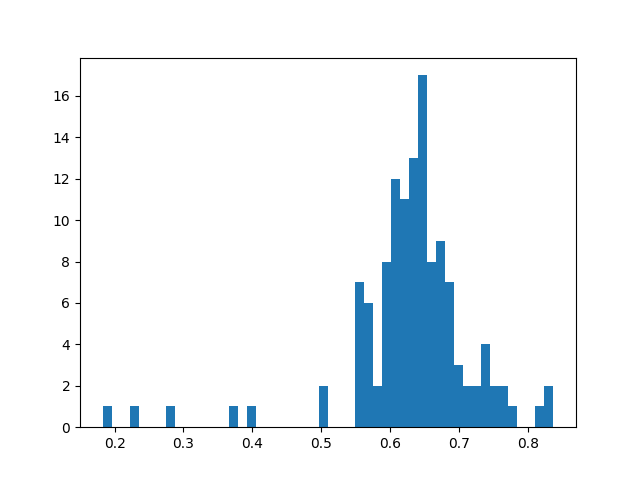

In [18]:
fig = plt.figure()
plt.hist(hmap['SI'], 50)

/tmp/ipykernel_694257/556416614.py:7: RuntimeWarning: invalid value encountered in divide
  stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
/tmp/ipykernel_694257/556416614.py:10: RuntimeWarning: invalid value encountered in divide
  stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)


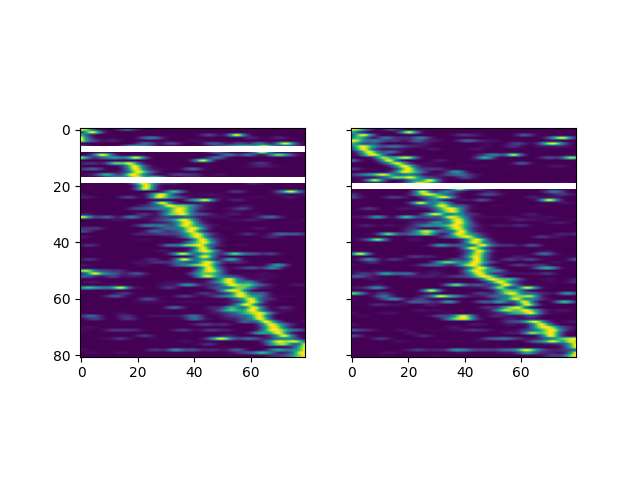

In [17]:
stack = hmap['smooth']['stack'][p3 >= .95, :].T
rasters = hmap['smooth']['rasters'][p3 >= .95, :, :]
order = np.argsort(np.argmax(stack, axis=0))

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
stack = np.mean(rasters[:, :, ::2], axis=2).T
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
ax[0].imshow(stack[:, order].T)
stack = np.mean(rasters[:, :, 1::2], axis=2).T
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
ax[1].imshow(stack[:, order].T)

In [25]:
from suite2p.blat import utils
from suite2p.blat.KSG import ksg_mi

x = spks
y = behaviour['position']
x = utils.fast_smooth(x, 30, axis=1)
%lprun -f ksg_mi I = ksg_mi(x, y)

print(I)

[0.59973834 0.78234979 0.61408031 0.86966553 0.81460116 0.80325108
 0.14137635 0.77491198 0.71126626 0.56435886 0.95225315 0.84284447
 0.69525208 0.80198785 0.79401912 0.49795861 0.84605743 0.77216241
 0.7241691  0.76146817 0.88355507 0.68103472 0.73853166 0.70094649
 0.79401147 0.78679996 0.65870508 0.84729657 0.76712545 0.69002234
 0.86932387 0.87236957 0.84089401 0.58183476 1.07865767 0.84080822
 0.76192786 0.84851199 0.89411167 0.81923428 0.85614378 0.71892513
 0.61588042 0.79346479 0.85102473 0.62882334 0.67537029 1.00402229
 0.77188161 0.84541422 0.88272592 0.63182505 0.78921127 0.82182594
 0.82426402 0.76047083 0.79667389 0.86843394 0.29652043 0.81170761
 0.77088479 0.632431   0.82757624 0.61380335 0.85386029 0.82148856
 0.7528741  0.78940291 0.84280984 0.77828569 0.74914661 0.79730864
 0.81869365 0.90466533 0.76627665 0.824912   0.8600211  0.5825879
 0.77063182 0.62927891 0.71964036 0.64273518 0.79056271 0.75583205
 0.53451916 0.83912361 0.83006812 0.31932798 0.79349975 0.83277

Timer unit: 1e-09 s

Total time: 7.94387 s
File: /home/loulou/Documents/GitHub/suite2p/suite2p/blat/KSG.py
Function: ksg_mi at line 23

Line #      Hits         Time  Per Hit   % Time  Line Contents
    23                                           def ksg_mi(x: np.ndarray, y: np.ndarray, k=5, method=1) -> np.ndarray:
    24                                               """
    25                                               KSG estimator for mutual information.
    26                                               This is an implementation of the second algorithm
    27                                               as we cannot make assumptions on equality of marginal
    28                                               spaces, especially with calcium data.
    29                                               Units of bits.
    30                                               I did everything to extract every bit of performance T_T
    31                                               "